<a href="https://colab.research.google.com/github/Ultrajonic/CameraTrap_Image_Classification/blob/main/Classify_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastai -Uqq fastbook
import fastbook
fastbook.setup_book()

In [8]:
from fastai import *
from fastai.vision import *
from fastbook import *

path = "/content/gdrive/MyDrive/My_DataSets/Datasets/Classify Datasets"

data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 get_y=parent_label,
                 splitter=RandomSplitter(),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))
dls = data.dataloaders(path)

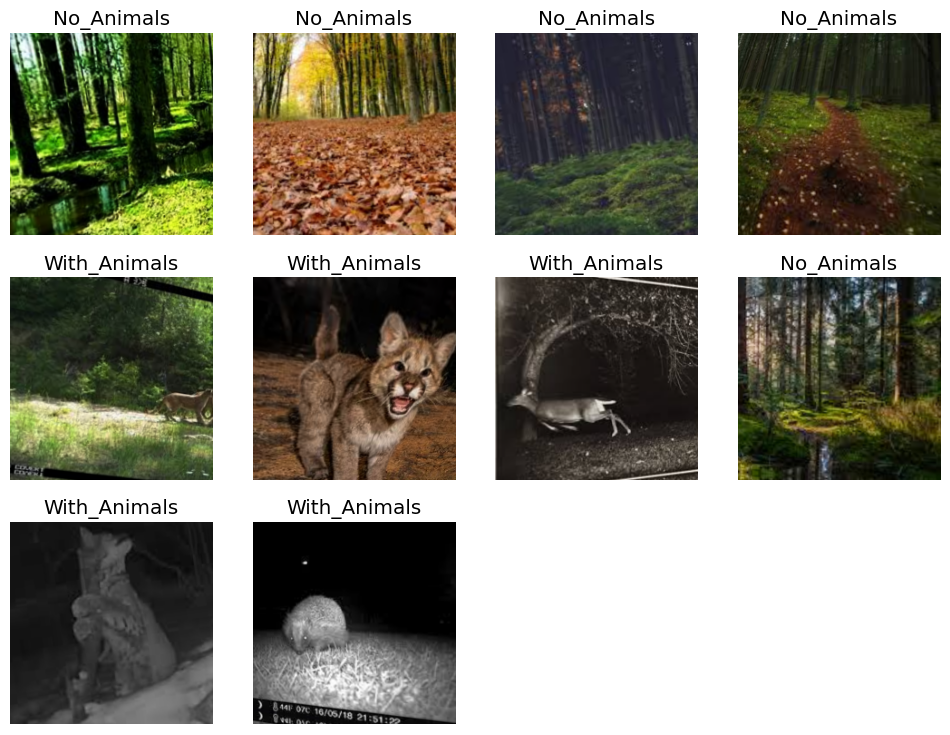

In [10]:
dls.show_batch(max_n=10)

In [11]:
learn = vision_learner(dls, resnet50, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 114MB/s]


SuggestedLRs(valley=0.0003311311302240938)

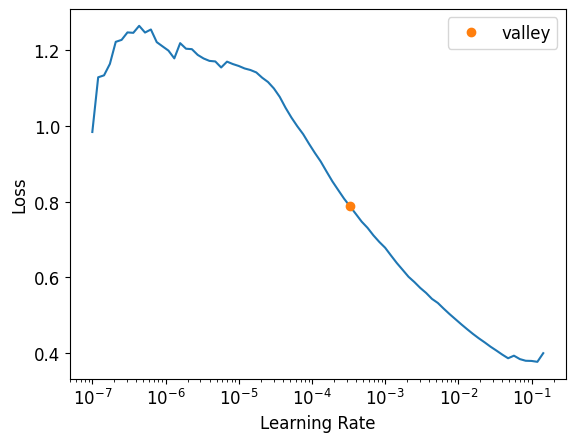

In [ ]:
learn.lr_find()

In [12]:
learn.fine_tune(10, 0.0003311311302240938)

epoch,train_loss,valid_loss,accuracy,time
0,1.457647,1.484926,0.433333,00:10


epoch,train_loss,valid_loss,accuracy,time
0,1.097283,1.269716,0.433333,00:03
1,1.270564,1.052402,0.466667,00:02
2,1.187160,0.867868,0.533333,00:02
3,1.070556,0.722760,0.566667,00:02
4,0.985736,0.634677,0.666667,00:02
5,0.925644,0.594302,0.700000,00:02
6,0.856751,0.562793,0.766667,00:02
7,0.817558,0.545501,0.766667,00:02
8,0.777448,0.520213,0.766667,00:02
9,0.739560,0.488598,0.766667,00:02


In [13]:
learn.save('stage-1') # saving the model weights

Path('models/stage-1.pth')

In [ ]:
learn.export('CameraTrap_model.pkl')

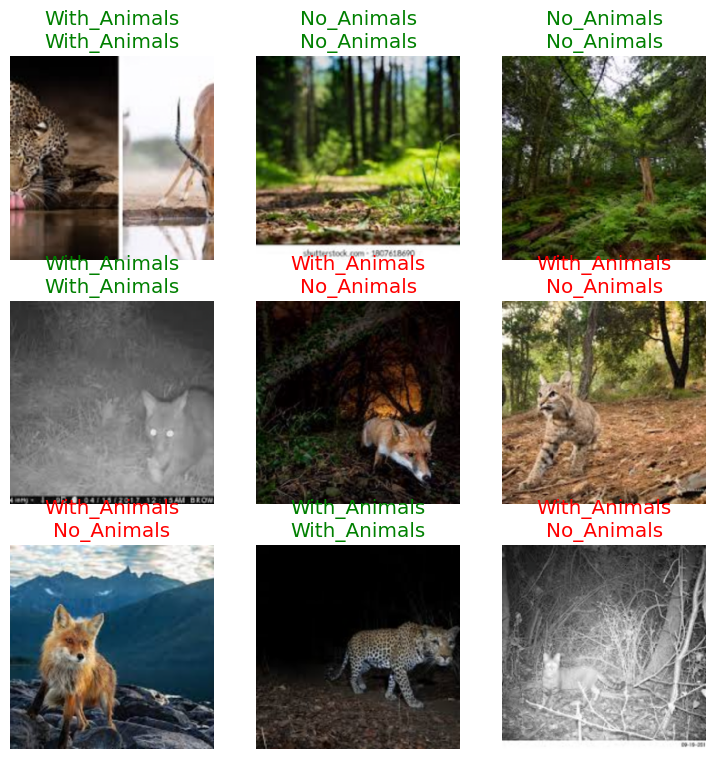

In [14]:
learn.show_results()

In [17]:
# make predictions
pred, pred_idx, probs = learn.predict('/content/gdrive/MyDrive/My_DataSets/Datasets/All Images/images (4).jpg')
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')

Prediction: With_Animals; Probability: 0.9870


In [18]:
import os
import shutil
from fastai.vision.all import *

###Train your Model
#Create the new folders for the two classes if they don't already exist:

source_folder = '//content/gdrive/MyDrive/My_DataSets/Datasets/All Images'
animal_folder = '/content/gdrive/MyDrive/My_DataSets/With_animal(s)_Rslts'
no_animal_folder = '/content/gdrive/MyDrive/My_DataSets/No_animal(s)_Rslts'

os.makedirs(animal_folder, exist_ok=True)
os.makedirs(no_animal_folder, exist_ok=True)
#Loop through all the images in the source folder, predict their classes, and move them to their respective new folders:

for file in os.listdir(source_folder):

    file_path = os.path.join(source_folder, file)

    # Check if the current item is an image file
    if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        pred, pred_idx, probs = learn.predict(file_path)

        if str(pred) == 'With_Animals':
            shutil.move(file_path, os.path.join(animal_folder, file))
        elif str(pred) == 'No_Animals':
            shutil.move(file_path, os.path.join(no_animal_folder, file))

**Challenge**





# New Section

In [ ]:
%%capture
!pip install gradio --upgrade

In [ ]:
import gradio as gr
from fastai.vision.all import *
import skimage

#installed the fastai
from fastai import *
from fastai.vision import *
#from fastbook import *

model_path = '/content/CameraTrap_model.pkl'
learn = load_learner(model_path)

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = "IMAGE CLASSIFICATION"
description = "AI WebApp classifying Wild-Animal Images."
article = "sample image"
examples = ['/content/gdrive/MyDrive/My_DataSets/CameraTrap/images (2).jpg']
interpretation = 'default'
enable_queue = True

gr.Interface(fn = predict, inputs = gr.inputs.Image(shape = (512, 512)),
outputs = gr.outputs.Label(num_top_classes = 2),
title = title,
description = description,
article = article,
examples = examples,
interpretation = interpretation,
enable_queue = enable_queue).launch()


<ipython-input-13-c95698495ecf>:26: UserWarning: `enable_queue` is deprecated in `Interface()`, please use it within `launch()` instead.
  gr.Interface(fn = predict, inputs = gr.inputs.Image(shape = (512, 512)),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>